In [1]:
import seaborn as sns
import pandas as pd

In [10]:
from numpy.random import default_rng
rng = default_rng(19716)    # setting an initial state

In [11]:
rng.uniform( 0, 1, size=4)

array([0.97584377, 0.65769739, 0.167421  , 0.7146286 ])

In [12]:
rng.uniform( -10, 4, size=4)

array([ 3.72533779, -0.49914512, -9.71652438, -8.86095247])

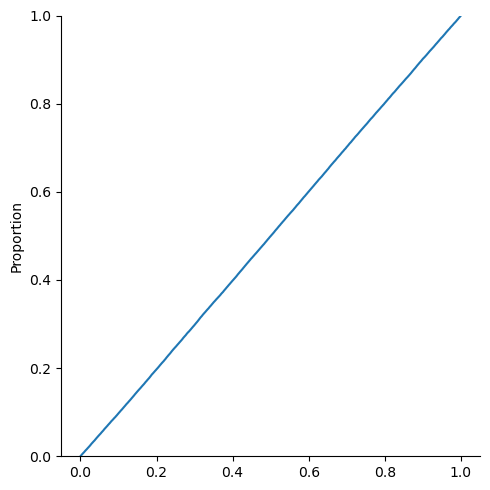

In [15]:
x = rng.uniform( size=100000 )
sns.displot(x, kind="ecdf");

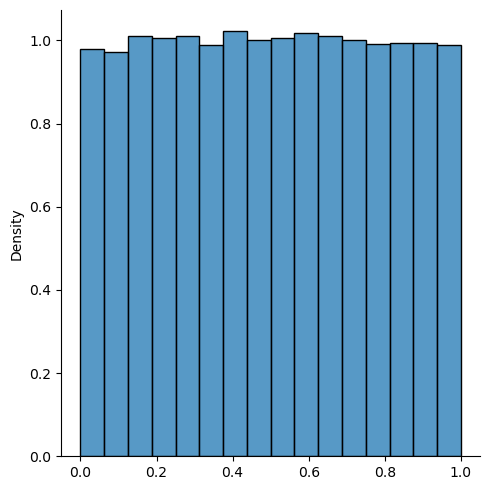

In [16]:
sns.displot(x, bins=16, stat="density");